<a href="https://colab.research.google.com/github/JohanMonster/MyRepos/blob/master/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar100
from keras.layers import *
from keras import *
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.initializers import he_normal
from keras.utils import to_categorical
%matplotlib inline

In [0]:
from keras.applications import ResNet50

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(train_data,train_labels),(test_data,test_labels)=cifar100.load_data()

169009152/169001437 [==============================] - 28s 0us/step


In [4]:
train_data.shape

(50000, 32, 32, 3)

In [13]:
(train_labels)

array([99])

In [0]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

Text(0.5, 1.0, 'orchid')

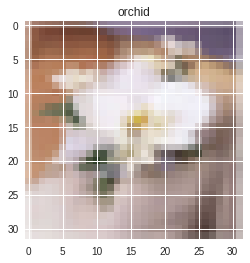

In [18]:
plt.imshow(train_data[1000])
plt.title(CIFAR100_LABELS_LIST[int(train_labels[1000])])

In [0]:

resnet50=ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3),pooling='avg')

In [0]:
train_data=train_data/255.

In [39]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
test_data=test_data/255.

In [0]:
train_labels=to_categorical(train_labels,num_classes=100)
test_labels=to_categorical(test_labels,num_classes=100)

In [0]:
for layer in resnet50.layers:
  layer.trainable=False
x=resnet50.output

In [0]:
 X=Dense(100,kernel_initializer='he_normal',activation='softmax')(resnet50.output)
  

In [0]:
model=Model(inputs=resnet50.inputs,outputs=X)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(train_data)

In [52]:
model.fit_generator(datagen.flow(train_data, train_labels, batch_size=256),
                        validation_data=(test_data, test_labels),
                        epochs=7,steps_per_epoch=len(train_data)/256)

Epoch 1/7
196/195 [==============================] - 343s 2s/step - loss: 3.9001 - acc: 0.2222 - val_loss: 7.1793 - val_acc: 0.0106
Epoch 2/7
196/195 [==============================] - 344s 2s/step - loss: 3.5756 - acc: 0.2462 - val_loss: 7.3111 - val_acc: 0.0101
Epoch 3/7
196/195 [==============================] - 335s 2s/step - loss: 3.4325 - acc: 0.2541 - val_loss: 7.2319 - val_acc: 0.0100
Epoch 4/7
196/195 [==============================] - 327s 2s/step - loss: 3.3305 - acc: 0.2618 - val_loss: 7.4085 - val_acc: 0.0100
Epoch 5/7
196/195 [==============================] - 326s 2s/step - loss: 3.2547 - acc: 0.2686 - val_loss: 7.3220 - val_acc: 0.0110
Epoch 6/7
196/195 [==============================] - 335s 2s/step - loss: 3.2007 - acc: 0.2752 - val_loss: 7.0670 - val_acc: 0.0100
Epoch 7/7
196/195 [==============================] - 343s 2s/step - loss: 3.1571 - acc: 0.2787 - val_loss: 6.9883 - val_acc: 0.0095


In [53]:
model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 69s 7ms/step


[6.988274006652832, 0.0095]